In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np

%matplotlib inline

In [11]:
# Vwcap for 'glacier' HRU - stops breaking when bigger or eq. then 0.25
# snowacc - total snow and ice accumulation 
# - varya 

s variable                      depth  ddepth  sacc  smelt  albedo
D                                                      
1999-10-01 00:00:00    0.0     0.0   0.0  0.408    0.15
1999-10-01 01:00:00    0.0     0.0   0.0  0.000    0.15
1999-10-01 02:00:00    0.0     0.0   0.0  0.000    0.15
1999-10-01 03:00:00    0.0     0.0   0.0  0.000    0.15
1999-10-01 04:00:00    0.0     0.0   0.0  0.000    0.15
...                    ...     ...   ...    ...     ...
2017-10-31 19:00:00    0.0     0.0   0.0  0.000    0.15
2017-10-31 20:00:00    0.0     0.0   0.0  0.000    0.15
2017-10-31 21:00:00    0.0     0.0   0.0  0.000    0.15
2017-10-31 22:00:00    0.0     0.0   0.0  0.000    0.15
2017-10-31 23:00:00    0.0     0.0   0.0  0.000    0.15

[158544 rows x 5 columns]
...
...
...
s variable                      depth  ddepth  sacc  smelt  albedo
D                                                      
1999-10-01 00:00:00    0.0     0.0   0.0  0.408    0.25
1999-10-01 01:00:00    0.0     0.0   0.0  0

  0%|                                                     | 0/1 [00:00<?, ?it/s]/Users/varyabazilova/Desktop/sedcas/varya_project/wsl_stay_10oct2022/glaciers_2/modules.py:976: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcond['cond2'][1:] = dfcond.cond1[:-1]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.64it/s]


hello world


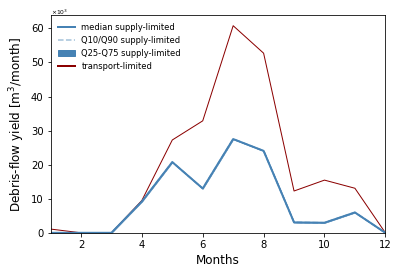

In [35]:
"""
Created on Thu Feb  3 16:56:57 2022

@author: hirschbe
"""

from SedCas_glacier import SedCas
# from SedCas import SedCas

# 
model = SedCas()
model.load_climate()
model.load_params()
model.run_hydro()
model.run_sediment()
model.save_output()
model.plot_sedyield_monthly()




In [36]:
# model.HRUs[2]# == 'glacier'
# model.HRUs

In [37]:
hydro_out = pd.read_csv('Hydro.out')#.set_index('D')

# hydro_out['snow_melt'] = hydro_out.snow - hydro_out.glacier_melt

In [38]:
hydro_out

,D,Q,Qs,Qss,Vw,snow,snowacc,PET,AET,Pr,Ta,glacier_melt,snow_melt
0,1999-10-01 00:00:00,0.000000,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.0,5.6,0.0408,-0.0408
1,1999-10-01 01:00:00,0.040000,0.0,0.040000,0.000000,0.0,-0.0400,0.0,0.0,0.0,5.5,0.0400,0.3600
2,1999-10-01 02:00:00,0.041600,0.0,0.041600,0.000000,0.0,-0.0416,0.0,0.0,0.0,5.7,0.0416,0.3744
3,1999-10-01 03:00:00,0.088566,0.0,0.088566,0.353034,0.0,-0.0416,0.0,0.0,0.4,5.7,0.0416,0.3744
4,1999-10-01 04:00:00,0.060013,0.0,0.060013,0.434621,0.0,-0.0416,0.0,0.0,0.1,5.7,0.0416,0.3744
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158539,2017-10-31 19:00:00,0.010232,0.0,0.010232,0.748814,0.0,-0.0072,0.0,0.0,0.0,1.4,0.0072,0.0648
158540,2017-10-31 20:00:00,0.010221,0.0,0.010221,0.745793,0.0,-0.0072,0.0,0.0,0.0,1.4,0.0072,0.0648
158541,2017-10-31 21:00:00,0.010210,0.0,0.010210,0.742783,0.0,-0.0072,0.0,0.0,0.0,1.4,0.0072,0.0648
158542,2017-10-31 22:00:00,0.010199,0.0,0.010199,0.739784,0.0,-0.0072,0.0,0.0,0.0,1.4,0.0072,0.0648


In [39]:
hydro_out.Q.sum() - hydro_out.Pr.sum() 

1806.142558353551

In [34]:
hydro_out.snowacc.sum()

1.6764367671839864e-14

In [40]:
hydro_out.glacier_melt.sum()

7395.9096

In [41]:
hydro_out.AET.sum()

5048.079446103014

In [56]:

hydro_out.Pr.sum() - hydro_out.AET.sum() - hydro_out.Q.sum()

# hydro_out.Pr.sum() + hydro_out.glacier_melt.sum() - hydro_out.AET.sum() - hydro_out.Q.sum()




38.9465436174562

In [50]:
hydro_out.Vw.values[-1] - hydro_out.Vw.values[0]

0.736795543420787

In [51]:
hydro_out.snow.values[-1] - hydro_out.snow.values[0]

0.0

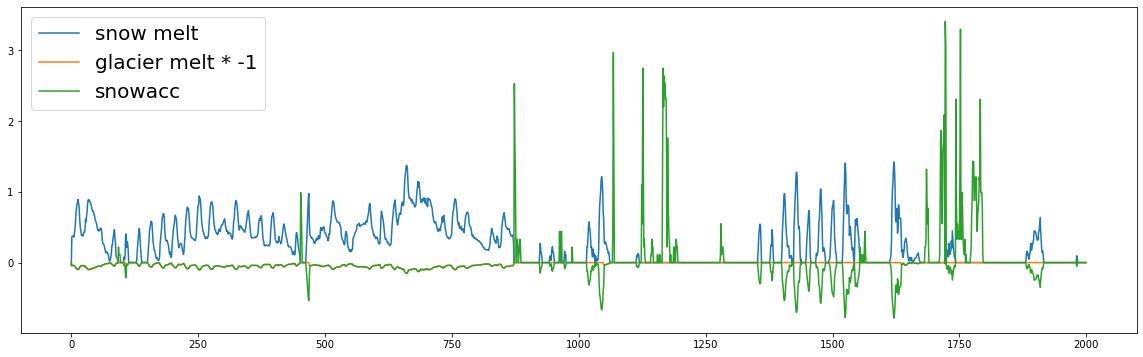

In [55]:
fig, ax = plt.subplots(figsize = (20, 6))

hydro_out = hydro_out[:2000]
gl = hydro_out.glacier_melt * -1

hydro_out.snow_melt.plot(label='snow melt')
# hydro_out.glacier_melt.plot(label='glacier melt')
gl.plot(label = 'glacier melt * -1')
hydro_out.snowacc.plot(label='snowacc')


plt.legend()
plt.legend(fontsize = 20)


In [10]:
# 

In [36]:
df = hydro_out
# df['snow_melt'] = np.where(df['sacc'] < 0, df['sacc']* -1, 0)
df = df.set_index('D')


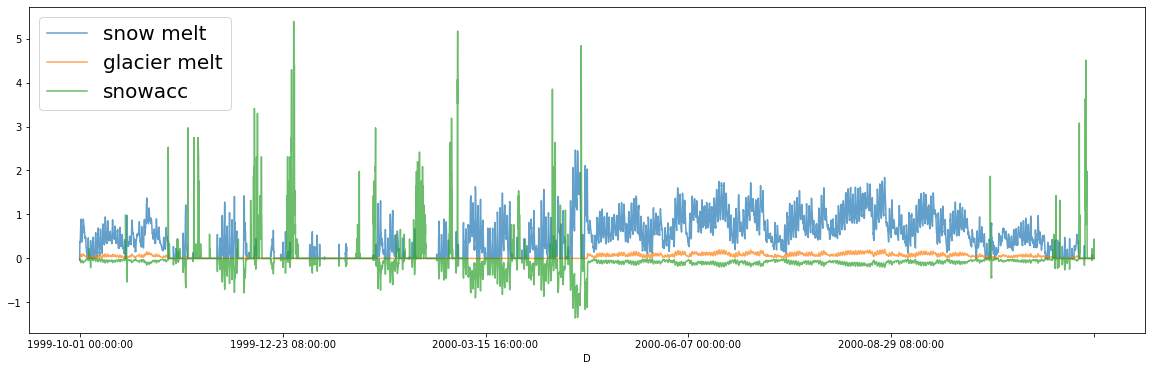

In [44]:
fig, ax = plt.subplots(figsize=(20, 6))

df2 = df[:10000]

df2.snow_melt.plot(label = 'snow melt', alpha = 0.7)
df2.glacier_melt.plot(label = 'glacier melt', alpha = 0.7)
df2.snowacc.plot(label = 'snowacc', alpha = 0.7)

plt.legend(fontsize = 20)
# plt.savefig('melt_subset_first10kvalues.png')

In [37]:
24*365

8760

In [21]:
model.save_output()


hello world


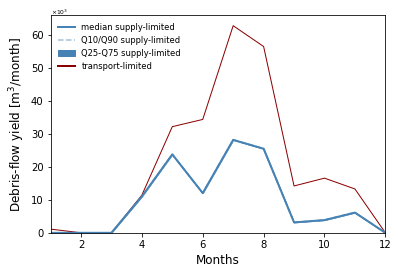

In [22]:
model.plot_sedyield_monthly()


<AxesSubplot:xlabel='D'>

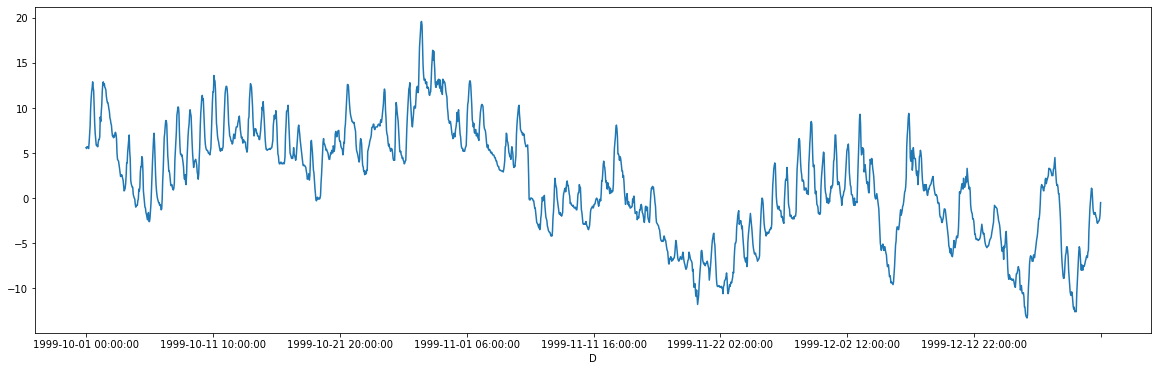

In [25]:
plt.figure(figsize = (20, 6))
df.Ta.plot()

In [ ]:
# climate

